In [92]:
import pandas as pd
import numpy as np
import seaborn as sns

In [323]:
#Import the main dataset here 
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [324]:
# Dropping off the columns which I think won't make the impact the on the model
df = df.drop(['instant', 'dteday', 'casual', 'registered', 'yr', 'temp'], axis=1)

In [325]:
df.head()

,season,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [326]:
# Rounding off the decimal values of columns
newDF = df[df.columns].apply(lambda x: np.round(x, decimals=1))
newDF.head()

,season,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,18.2,80.6,10.7,985
1,1,1,0,0,0,2,17.7,69.6,16.7,801
2,1,1,0,1,1,1,9.5,43.7,16.6,1349
3,1,1,0,2,1,1,10.6,59.0,10.7,1562
4,1,1,0,3,1,1,11.5,43.7,12.5,1600


##### Encoding the columns like Season, Month, Weathersit

I tried to encode the model based on months also but that was not creating any impact on its accuracy. 

In [ ]:
import calendar

#Converting numbers to season.
# monthsName = {i+1: calendar.month_name[i+1][:3] for i in range(len(newDF['mnth'].unique()))}
# newDF['mnth'] = newDF['mnth'].map(monthsName)
newDF['season'] = newDF['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
newDF

In [328]:
newDF['weathersit'] = newDF['weathersit'].map({1:'Clear', 2:'Mist + Cloudy', 3:'Light Rain', 4: 'Heavy Rain'})

In [329]:
newDF.head()

,season,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,1,0,6,0,Mist + Cloudy,18.2,80.6,10.7,985
1,spring,1,0,0,0,Mist + Cloudy,17.7,69.6,16.7,801
2,spring,1,0,1,1,Clear,9.5,43.7,16.6,1349
3,spring,1,0,2,1,Clear,10.6,59.0,10.7,1562
4,spring,1,0,3,1,Clear,11.5,43.7,12.5,1600


In [415]:
#Creating the encoding values using pandas dummies function for weathersit and season

test1 = pd.get_dummies(newDF['weathersit'], drop_first = True)
# test2 = pd.get_dummies(newDF['mnth'])
test3 = pd.get_dummies(newDF['season'],  drop_first = True)
# test4 = pd.get_dummies(newDF['weekday'])



In [416]:
# newDF = newDF.drop(['weathersit', 'mnth', 'season', 'weekday'])
test = pd.concat([newDF, test1, test3])
finalDF = test.drop(['weathersit', 'season'], axis=1)


In [417]:
finalDF = finalDF.iloc[0:730]
finalDF = finalDF.fillna(0)
finalDF

,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,Light Rain,Mist + Cloudy,spring,summer,winter
0,1.0,0.0,6.0,0.0,18.2,80.6,10.7,985.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,17.7,69.6,16.7,801.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,1.0,9.5,43.7,16.6,1349.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,2.0,1.0,10.6,59.0,10.7,1562.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,3.0,1.0,11.5,43.7,12.5,1600.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,12.0,0.0,4.0,1.0,11.3,65.3,23.5,2114.0,0.0,0.0,0.0,0.0,0.0
726,12.0,0.0,5.0,1.0,12.8,59.0,10.4,3095.0,0.0,0.0,0.0,0.0,0.0
727,12.0,0.0,6.0,0.0,12.1,75.3,8.3,1341.0,0.0,0.0,0.0,0.0,0.0
728,12.0,0.0,0.0,0.0,11.6,48.3,23.5,1796.0,0.0,0.0,0.0,0.0,0.0


In [418]:
# Splitting the dataset into training and test dataset

from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(finalDF, train_size = 0.7, test_size = 0.3, random_state = 100)

In [419]:
from sklearn.preprocessing import MinMaxScaler

In [420]:
scaler = MinMaxScaler()

In [421]:
# Apply scaler() to all columns whose values are greater than 1. 
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\nvats\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\nvats\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:2966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\nvats\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

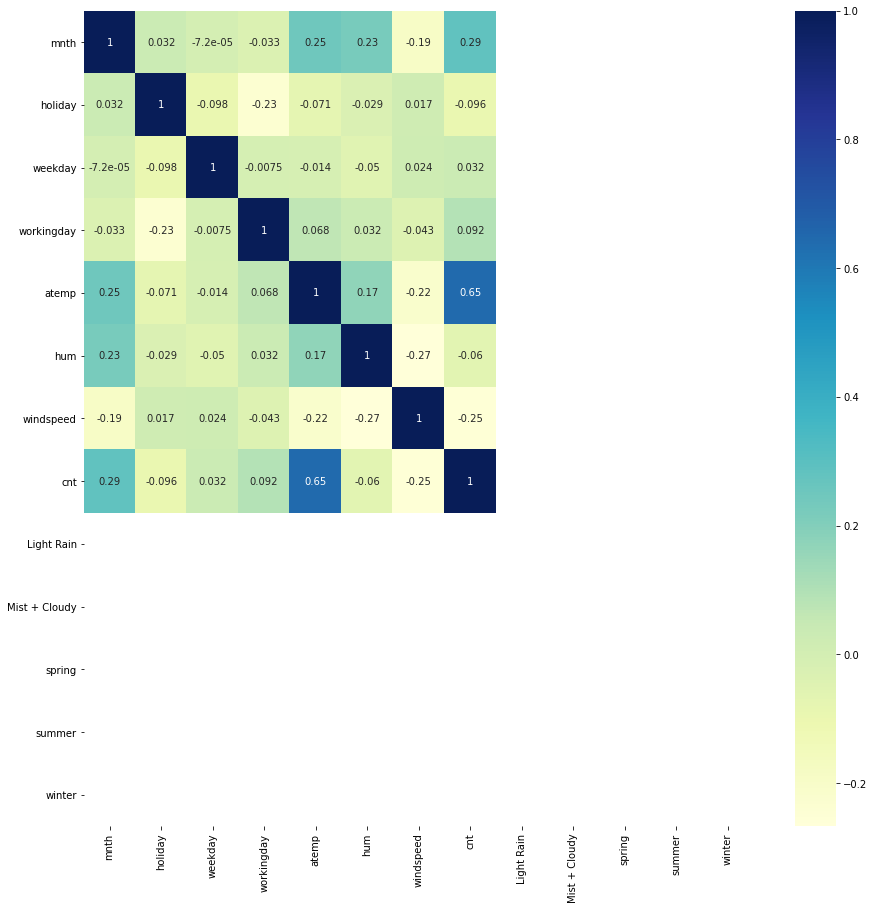

In [422]:
# Checking the correlation coefficients to see which variables are highly correlated

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [423]:
# Intializing the training dataset

y_train = df_train.pop('cnt')
X_train = df_train

In [424]:
# first making linerar regression model with one variable "atemp"  

import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [425]:
lr.params

const    0.163681
atemp    0.682118
dtype: float64

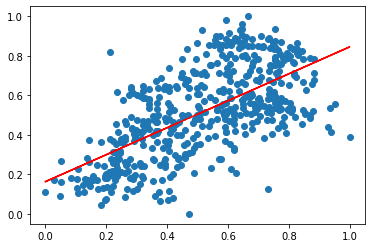

In [426]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.163 + 0.682 * X_train_lm.iloc[:, 1], 'r')
plt.show()

In [427]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           1.13e-61
Time:                        23:29:21   Log-Likelihood:                 176.48
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1637      0.020      8.251      0.0

In [428]:
# Making the MLR with "atemp" and "mnth"
X_train_lm = X_train[['mnth', 'atemp']]

In [429]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.124857
mnth     0.008678
atemp    0.647015
dtype: float64

In [430]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     195.0
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           1.58e-63
Time:                        23:29:27   Log-Likelihood:                 183.97
No. Observations:                 510   AIC:                            -361.9
Df Residuals:                     507   BIC:                            -349.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1249      0.022      5.684      0.000       0.082       0.168
mnth           0.0087      0.002      3.888      0.000       0.004       0.013
atemp          0.6470      0.036     17.789      0.000       0.576       0.718
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                1.598
Skew:                           0.015   Prob(JB):                        0.450
Kurtosis:                       2.727   Cond. No.                         39.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [431]:
# Making MLR with all the variables

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const            0.401894
mnth             0.010658
holiday         -0.069708
weekday          0.003116
workingday       0.022302
atemp            0.640746
hum             -0.374212
windspeed       -0.205045
Light Rain       0.000000
Mist + Cloudy    0.000000
spring           0.000000
summer           0.000000
winter           0.000000
dtype: float64

In [432]:
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     195.0
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           1.58e-63
Time:                        23:29:30   Log-Likelihood:                 183.97
No. Observations:                 510   AIC:                            -361.9
Df Residuals:                     507   BIC:                            -349.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1249      0.022      5.684      0.0

In [433]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [434]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\nvats\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
5,hum,11.43
4,atemp,6.89
0,mnth,5.04
6,windspeed,3.55
3,workingday,3.11
2,weekday,3.01
1,holiday,1.08
7,Light Rain,NaN
8,Mist + Cloudy,NaN
9,spring,NaN


In [435]:
# Dropping highly correlated variables and insignificant variables which is "hum" here right now

X = X_train.drop('hum', 1,)

In [436]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [437]:
# Print the summary of the model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     68.86
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           2.12e-62
Time:                        23:29:44   Log-Likelihood:                 191.41
No. Observations:                 510   AIC:                            -368.8
Df Residuals:                     503   BIC:                            -339.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1610      0.034      4.777

C:\Users\nvats\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


### This has slightly improve the accuracy of the model

In [438]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\nvats\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
4,atemp,5.46
0,mnth,4.26
5,windspeed,3.18
3,workingday,2.89
2,weekday,2.87
1,holiday,1.07
6,Light Rain,NaN
7,Mist + Cloudy,NaN
8,spring,NaN
9,summer,NaN


In [440]:
X = X.drop(['Light Rain','spring','summer', 'winter','Mist + Cloudy'], 1)

In [441]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [442]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     68.86
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           2.12e-62
Time:                        23:30:42   Log-Likelihood:                 191.41
No. Observations:                 510   AIC:                            -368.8
Df Residuals:                     503   BIC:                            -339.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1610      0.034      4.777      0.0

In [443]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,5.46
0,mnth,4.26
5,windspeed,3.18
3,workingday,2.89
2,weekday,2.87
1,holiday,1.07


## This is the final model

In [444]:
y_train_price = lr_3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

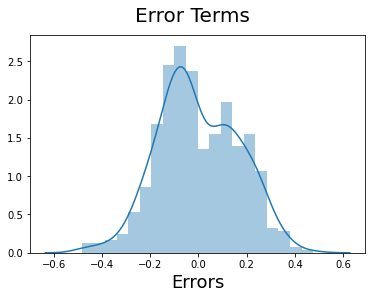

In [445]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

## Testing the model now

In [446]:
# Apply scaler() to all columns whose values are greater than 1. 
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

C:\Users\nvats\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\nvats\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:2966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\nvats\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

In [447]:
y_test = df_test.pop('cnt')
X_test = df_test

In [448]:
X_test

,mnth,holiday,weekday,workingday,atemp,hum,windspeed,Light Rain,Mist + Cloudy,spring,summer,winter
184,7.0,1.0,1.0,0.0,0.780220,0.534819,0.150943,0.0,0.0,0.0,0.0,0.0
535,6.0,0.0,3.0,1.0,0.854396,0.470752,0.230189,0.0,0.0,0.0,0.0,0.0
299,10.0,0.0,4.0,1.0,0.494505,0.778552,0.445283,0.0,0.0,0.0,0.0,0.0
221,8.0,0.0,3.0,1.0,0.804945,0.236769,0.449057,0.0,0.0,0.0,0.0,0.0
152,6.0,0.0,4.0,1.0,0.750000,0.071031,0.683019,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
400,2.0,0.0,0.0,0.0,0.228022,0.604457,0.388679,0.0,0.0,0.0,0.0,0.0
702,12.0,0.0,2.0,1.0,0.510989,0.668524,0.384906,0.0,0.0,0.0,0.0,0.0
127,5.0,0.0,0.0,0.0,0.576923,0.526462,0.132075,0.0,0.0,0.0,0.0,0.0
640,10.0,0.0,3.0,1.0,0.689560,0.752089,0.113208,0.0,0.0,0.0,0.0,0.0


In [449]:
# Adding constant variable to test dataframe
X_test_m3 = sm.add_constant(X_test)

In [450]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m3 = X_test_m3.drop(['Light Rain','spring','summer', 'winter','Mist + Cloudy', 'hum'], axis = 1)

In [451]:
# Making predictions using the fourth model

y_pred_m3 = lr_3.predict(X_test_m3)

Text(0, 0.5, 'y_pred')

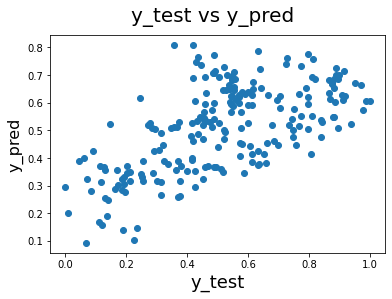

In [452]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m3)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 